# Ensembling and Stacking

http://mlwave.com/kaggle-ensembling-guide/

In [1]:
%matplotlib inline
%load_ext autoreload
%autoreload 2
import os
import sys

import csv
import datetime
import itertools
import numpy as np
import pandas as pd
import random
import re
import sklearn
import time
from collections import defaultdict

import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style("whitegrid")
sns.set_context(rc={
       "figure.figsize": (16, 10),
       "axes.titlesize": 14})

from IPython.display import Image, display
from IPython.core.display import HTML
HTML("<style>.container { width:100% !important; }</style>")

from os.path import expanduser
sys.path.insert(1, '{}/datsci'.format(expanduser('~')))
from datsci import eda, munge, ml, ensemble
from datsci import kaggle as kg

In [2]:
import santander

from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier as KNC
from sklearn.ensemble import RandomForestClassifier as RFC
from sklearn.ensemble import RandomForestRegressor as RFR
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import AdaBoostClassifier as ABC
from sklearn.ensemble import GradientBoostingClassifier as GBC
from sklearn.linear_model import SGDClassifier as SGDClf
from sklearn.cross_validation import train_test_split

from sklearn.metrics import f1_score
from sklearn.metrics import accuracy_score
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve, auc
from sklearn.metrics import make_scorer

import xgboost as xgb

## Creating ensembles from submission files

### Weighted Average (Submission Bagging)

In [26]:
!ls submissions | cat

avg_1hot_deltanan_unweighted.csv
xgb.fine_tuned.1hot.csv
xgb.fine_tuned.1hot.fit_all.csv
xgb.fine_tuned.1hot.fit_all_cv.csv
xgb.fine_tuned.deltanan.csv
xgb.fine_tuned.deltanan.fit_all.csv
xgb.fine_tuned.deltanan.fit_all_cv.csv


In [44]:
# Unweighted average
fnames = [
    'submissions/xgb.fine_tuned.1hot.csv',
    'submissions/xgb.fine_tuned.1hot.fit_all.csv',
    'submissions/xgb.fine_tuned.1hot.fit_all_cv.csv',
    'submissions/xgb.fine_tuned.deltanan.csv',
    'submissions/xgb.fine_tuned.deltanan.fit_all.csv',
    'submissions/xgb.fine_tuned.deltanan.fit_all_cv.csv']

# Score 0.838476
y_hat_avg = kg.weighted_avg_from_files(
    fnames,
    "submissions/avg_1hot_deltanan_unweighted.csv",
    weights=[],
    sample_submission_file='data/sample_submission.csv',
    sample_submission_idx='ID'
)

In [47]:
# Weight the heavily fine-tuned ones more

# Score 0.838588
y_hat_avg = kg.weighted_avg_from_files(
    fnames,
    "submissions/avg_1hot_deltanan_weighted.csv",
    weights=[1, 1, 2, 1, 1, 3],
    sample_submission_file='data/sample_submission.csv',
    sample_submission_idx='ID'
)

### Voting

Not fit for regression

### Correlation

Find highly uncorrelated predictions and average them

In [62]:
y_hats = pd.DataFrame([pd.read_csv(f, index_col='ID', squeeze=True).rename(f) for f in fnames]).T

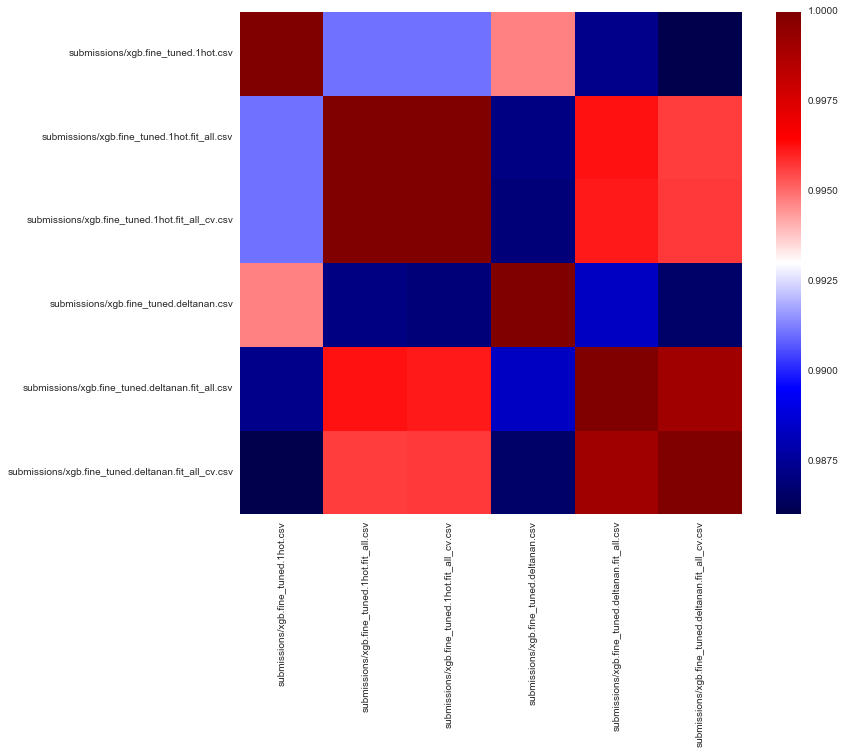

In [76]:
corr = eda.corr_heat(y_hats)

## Stacked Generalization

## Blending